C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


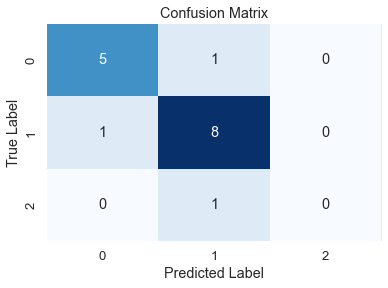

Accuracy: 0.8125
Precision: 0.7625
Recall: 0.8125
F1 Score: 0.7861842105263158


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

file_path = 'weatherdata.csv'  
data = pd.read_csv(file_path)

# Convert DataFrame to NumPy array
dataset = data.values

# Split features and class labels
X = dataset[:, :-1]  # Features
y = dataset[:, -1]  # Class labels

# Perform label encoding on the categorical features and target variable
label_encoders = [LabelEncoder() for _ in range(X.shape[1])]
X_encoded = np.column_stack([label_encoders[i].fit_transform(X[:, i]) for i in range(X.shape[1])])
y_encoded = label_encoders[-1].fit_transform(y)

# Implement Multinomial Naïve Bayes classifier
model = MultinomialNB()
model.fit(X_encoded, y_encoded)

# Predict class labels
y_pred = model.predict(X_encoded)

# Compute evaluation metrics
accuracy = accuracy_score(y_encoded, y_pred)
precision = precision_score(y_encoded, y_pred, average='weighted')
recall = recall_score(y_encoded, y_pred, average='weighted')
f1 = f1_score(y_encoded, y_pred, average='weighted')

# Compute confusion matrix
conf_matrix = confusion_matrix(y_encoded, y_pred)

# Plot confusion matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

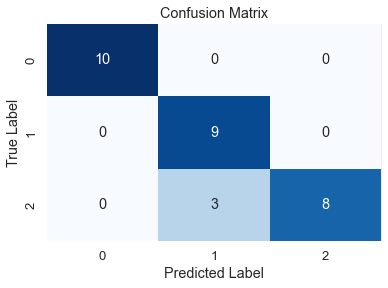

Accuracy: 0.9
Precision: 0.925
Recall: 0.9
F1 Score: 0.899248120300752


In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement Multinomial Naïve Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict class labels
y_pred = model.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)